In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
def Rebuild_All():
    print("===== Rebuilding Code =====")
    os.system("mkdir ./build/ && mkdir ./base/build/ && mkdir ./gpu_naive/build/")
    output = os.system("cd ./build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)
    output = os.system("cd ./base/build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)    
    output = os.system("cd ./gpu_naive/build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)



In [4]:
Rebuild_All()

===== Rebuilding Code =====
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/build
0
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/base/build
0
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/gpu_naive/build
0


mkdir: cannot create directory ‘./build/’: File exists


In [5]:
import subprocess
def Test_Base(nlayer=1000, width=512, seed = 0):
    ret, val = subprocess.getstatusoutput(f"./base/build/base -n {nlayer} -w {width} -s {seed}")
    print(f"Base[n={nlayer}, w={width}]:", val)
    return float(val)

In [6]:
def Test_GPU_Naive(nlayer=1000, width=512, NUM_THREADS = 32, seed = 0):
    ret, val = subprocess.getstatusoutput(f"./gpu_naive/build/gpu -n {nlayer} -w {width} -s {seed} -t {NUM_THREADS}")
    print(f"GPU_Naive[n={nlayer}, w={width}]:", val)
    return float(val)

In [7]:
def Test_GPU(nlayer=1000, width=512, NUM_THREADS = 32, seed = 0):
    print(f"./build/gpu -n {nlayer} -w {width} -s {seed} -t {NUM_THREADS}")
    ret, val = subprocess.getstatusoutput(f"./build/gpu -n {nlayer} -w {width} -s {seed} -t {NUM_THREADS}")
    print(f"GPU[n={nlayer}, w={width}]:", val)
    return float(val)

In [8]:
Test_Base(5000, 1024)
Test_GPU_Naive(5000, 1024)
Test_GPU(5000, 1024)

Base[n=5000, w=1024]: 2.44233
GPU_Naive[n=5000, w=1024]: 1.40658
./build/gpu -n 5000 -w 1024 -s 0 -t 32
GPU[n=5000, w=1024]: 0.345181


0.345181

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Calculating width: 10
Base[n=1000, w=10]: 0.496289
GPU_Naive[n=1000, w=10]: 0.388914
./build/gpu -n 1000 -w 10 -s 0 -t 32
GPU[n=1000, w=10]: 0.0709244
Calculating width: 100
Base[n=1000, w=100]: 0.48774
GPU_Naive[n=1000, w=100]: 0.266148
./build/gpu -n 1000 -w 100 -s 0 -t 32
GPU[n=1000, w=100]: 0.0700053
Calculating width: 1000
Base[n=1000, w=1000]: 0.504332
GPU_Naive[n=1000, w=1000]: 0.266038
./build/gpu -n 1000 -w 1000 -s 0 -t 32
GPU[n=1000, w=1000]: 0.0699001


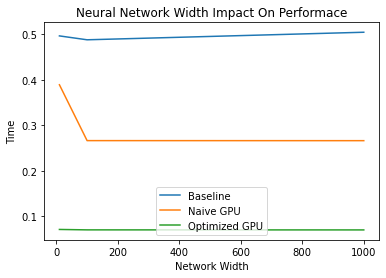

In [10]:
width_arr = [10, 100, 1000]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for width in width_arr:
    print("Calculating width:", width)
    result_arr_Base.append( Test_Base(1000, width) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(1000, width, 32) )
    result_arr_GPU.append(Test_GPU(1000, width, 32))

x = np.array(width_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Width')
ax.set_ylabel('Time')
ax.set_title('Neural Network Width Impact On Performace')
ax.legend()
plt.show()

Calculating nalyer: 10
Base[n=10, w=10000]: 0.00489363
GPU_Naive[n=10, w=10000]: 0.00269179
./build/gpu -n 10 -w 10000 -s 0 -t 128
GPU[n=10, w=10000]: 0.000738565
Calculating nalyer: 100
Base[n=100, w=10000]: 0.0479747
GPU_Naive[n=100, w=10000]: 0.0265257
./build/gpu -n 100 -w 10000 -s 0 -t 128
GPU[n=100, w=10000]: 0.00658486
Calculating nalyer: 1000
Base[n=1000, w=10000]: 0.460133
GPU_Naive[n=1000, w=10000]: 0.264745
./build/gpu -n 1000 -w 10000 -s 0 -t 128
GPU[n=1000, w=10000]: 0.0631309


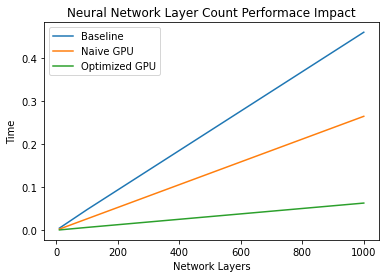

In [11]:
nlayer_arr = [10, 100, 1000]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for nlayer in nlayer_arr:
    print("Calculating nalyer:", nlayer)
    result_arr_Base.append( Test_Base(nlayer, 10000) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(nlayer, 10000, 128) )
    result_arr_GPU.append(Test_GPU(nlayer, 10000, 128))

x = np.array(nlayer_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Layers')
ax.set_ylabel('Time')
ax.set_title('Neural Network Layer Count Performace Impact')
ax.legend()
plt.show()

Calculating NUM_THREADS: 32
Base[n=1000, w=10000]: 0.463549
GPU_Naive[n=1000, w=10000]: 0.264794
./build/gpu -n 1000 -w 10000 -s 0 -t 32
GPU[n=1000, w=10000]: 0.0648817
Calculating NUM_THREADS: 64
Base[n=1000, w=10000]: 0.443761
GPU_Naive[n=1000, w=10000]: 0.264746
./build/gpu -n 1000 -w 10000 -s 0 -t 64
GPU[n=1000, w=10000]: 0.0637585
Calculating NUM_THREADS: 128
Base[n=1000, w=10000]: 0.445722
GPU_Naive[n=1000, w=10000]: 0.264721
./build/gpu -n 1000 -w 10000 -s 0 -t 128
GPU[n=1000, w=10000]: 0.0634853
Calculating NUM_THREADS: 256
Base[n=1000, w=10000]: 0.457117
GPU_Naive[n=1000, w=10000]: 0.264909
./build/gpu -n 1000 -w 10000 -s 0 -t 256
GPU[n=1000, w=10000]: 0.0632256
Calculating NUM_THREADS: 512
Base[n=1000, w=10000]: 0.445859
GPU_Naive[n=1000, w=10000]: 0.264851
./build/gpu -n 1000 -w 10000 -s 0 -t 512
GPU[n=1000, w=10000]: 0.0629762
Calculating NUM_THREADS: 1024
Base[n=1000, w=10000]: 0.492483
GPU_Naive[n=1000, w=10000]: 0.266358
./build/gpu -n 1000 -w 10000 -s 0 -t 1024
GPU[n=10

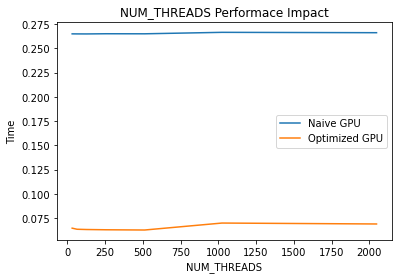

In [12]:
NUM_THREADS_arr = [32,64,128,256,512,1024,2048]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for NUM_THREADS in NUM_THREADS_arr:
    print("Calculating NUM_THREADS:", NUM_THREADS)
    result_arr_Base.append( Test_Base(1000, 10000) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(1000, 10000, NUM_THREADS) )
    result_arr_GPU.append(Test_GPU(1000, 10000, NUM_THREADS))

x = np.array(NUM_THREADS_arr)
fig, ax = plt.subplots()
# ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('NUM_THREADS')
ax.set_ylabel('Time')
ax.set_title('NUM_THREADS Performace Impact')
ax.legend()
plt.show()

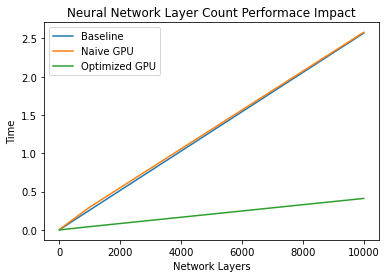

In [15]:
# on w=512, n=10-10000
nlayer_arr = [10, 100, 1000, 10000]
result_arr_Base = [0.00261312, 0.0260582, 0.257989, 2.56922]
result_arr_GPU_Naive = [0.00286903, 0.0324759, 0.296532, 2.58011]
result_arr_GPU = [0.000492963, 0.00447039, 0.0431658, 0.411377]

x = np.array(nlayer_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Layers')
ax.set_ylabel('Time')
ax.set_title('Neural Network Layer Count Performace Impact')
ax.legend()
plt.show()

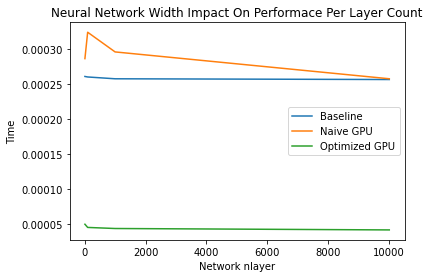

In [20]:
# n = 100, w = 64 - 4096 Cost Per nlayer
nlayer_arr = [10, 100, 1000, 10000]
result_arr_Base = [0.00261312, 0.0260582, 0.257989, 2.56922]
result_arr_GPU_Naive = [0.00286903, 0.0324759, 0.296532, 2.58011]
result_arr_GPU = [0.000492963, 0.00447039, 0.0431658, 0.411377]

for i in range(0, len(nlayer_arr)):
    result_arr_Base[i] /= nlayer_arr[i]
    result_arr_GPU_Naive[i] /= nlayer_arr[i]
    result_arr_GPU[i] /= nlayer_arr[i]

x = np.array(nlayer_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network nlayer')
ax.set_ylabel('Time')
ax.set_title('Neural Network Width Impact On Performace Per Layer Count')
ax.legend()
plt.show()

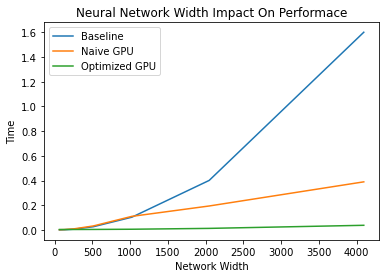

In [16]:
# n = 100, w = 64 - 4096
width_arr = [64, 128, 256, 512, 1024,2048,4096]
result_arr_Base = [0.000506359, 0.00174489, 0.00629647, 0.0261457, 0.103547, 0.40124, 1.60073]
result_arr_GPU_Naive = [0.00194382, 0.00333156, 0.00912334, 0.032459, 0.110295, 0.194247, 0.389658]
result_arr_GPU = [0.00389887, 0.00388852, 0.00396187, 0.00442147, 0.00600941, 0.0129223, 0.0379119]

x = np.array(width_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Width')
ax.set_ylabel('Time')
ax.set_title('Neural Network Width Impact On Performace')
ax.legend()
plt.show()

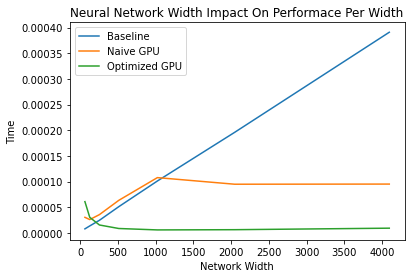

In [18]:
# n = 100, w = 64 - 4096 Cost Per Width
width_arr = [64, 128, 256, 512, 1024,2048,4096]
result_arr_Base = [0.000506359, 0.00174489, 0.00629647, 0.0261457, 0.103547, 0.40124, 1.60073]
result_arr_GPU_Naive = [0.00194382, 0.00333156, 0.00912334, 0.032459, 0.110295, 0.194247, 0.389658]
result_arr_GPU = [0.00389887, 0.00388852, 0.00396187, 0.00442147, 0.00600941, 0.0129223, 0.0379119]

for i in range(0, len(width_arr)):
    result_arr_Base[i] /= width_arr[i]
    result_arr_GPU_Naive[i] /= width_arr[i]
    result_arr_GPU[i] /= width_arr[i]

x = np.array(width_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Width')
ax.set_ylabel('Time')
ax.set_title('Neural Network Width Impact On Performace Per Width')
ax.legend()
plt.show()